In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
import seaborn as sns
from sklearn.inspection import permutation_importance
from sklearn.compose import make_column_transformer
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
#from keras.models import Sequential
#from keras.layers import Dense

In [5]:
df = pd.read_excel('../data/Reporte_de_Incentivos_GM_AI.xlsx', header=0)
df = df.fillna(0)

In [6]:
df.head()

,MODEL/SEGMENT,Date,UID,Make,Model,Version,Model year,Body Type,Transmission,Doors,...,Free Mantenaince,Valid Since,Valid Until,Volumen,Plan Cost,Monthly Payment,Commission Cost,Insurance Cost,Total Finance,GM Segment
0,CORVETTE,2023-07-01,8338421,Acura,Integra,1.5 A-SPEC CVT,2024,LB,Automático,5,...,0.0,2023-06-30,2023-07-31,1,9743.496252,22265.898498,19122.75,36216.52,28866.246252,Luxury Car-2
1,ENCLAVE/XT5/ACADIA,2023-07-01,8302827,Acura,RDX,2.0 ADVANCE AUTO AWD,2023,OD,Automático,5,...,0.0,2023-06-30,2023-07-31,26,79244.032125,29197.215315,21373.10,37949.31,79244.032125,Luxury SUV-3
2,ENCLAVE/XT5/ACADIA,2023-07-01,8019786,Acura,RDX,2.0 A-SPEC AUTO AWD,2023,OD,Automático,5,...,0.0,2023-06-30,2023-07-31,13,84175.210299,31014.092435,22703.10,39936.90,84175.210299,Luxury SUV-3
3,SEDAN,2023-07-01,8226879,Acura,TLX,2.0 ADVANCE AUTO,2023,SA,Automático,4,...,0.0,2023-06-30,2023-07-31,3,12609.567637,28815.462711,24747.75,38314.80,37357.317637,Luxury Car-3
4,SEDAN,2023-07-01,8306557,Acura,TLX,3.0 TYPE S AUTO AWD,2023,SA,Automático,4,...,0.0,2023-06-30,2023-07-31,1,15475.639022,35365.026924,30372.75,46007.44,45848.389022,Luxury Car-3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16132 entries, 0 to 16131
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   MODEL/SEGMENT       16132 non-null  object        
 1   Date                16132 non-null  datetime64[ns]
 2   UID                 16132 non-null  int64         
 3   Make                16132 non-null  object        
 4   Model               16132 non-null  object        
 5   Version             16132 non-null  object        
 6   Model year          16132 non-null  int64         
 7   Body Type           16132 non-null  object        
 8   Transmission        16132 non-null  object        
 9   Doors               16132 non-null  int64         
 10  MSRP                16132 non-null  float64       
 11  Final Price         16132 non-null  int64         
 12  Down Payment        16132 non-null  float64       
 13  Term Since          16132 non-null  float64   

In [8]:
# Remove Non-needed or irrelevant Columns
columns_to_drop = ['Body Type','Transmission', 'Doors', 'Promotion 1','Promotion 2','Promotion 3','Name Plan']
df_dropped = df.drop(columns=columns_to_drop)

# Now I'll drop datetime cells for testing purposes:
datetime_cols = ['Valid Since', 'Valid Until', 'Date']
df_dropped = df_dropped.drop(columns=datetime_cols)

df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16132 entries, 0 to 16131
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MODEL/SEGMENT       16132 non-null  object 
 1   UID                 16132 non-null  int64  
 2   Make                16132 non-null  object 
 3   Model               16132 non-null  object 
 4   Version             16132 non-null  object 
 5   Model year          16132 non-null  int64  
 6   MSRP                16132 non-null  float64
 7   Final Price         16132 non-null  int64  
 8   Down Payment        16132 non-null  float64
 9   Term Since          16132 non-null  float64
 10  Term Until          16132 non-null  float64
 11  Rate                16132 non-null  float64
 12  Residual            16132 non-null  float64
 13  Opening Commission  16132 non-null  float64
 14  Subsidized Plan     16132 non-null  object 
 15  Plan Type           16132 non-null  object 
 16  Disc

In [9]:
# "Fix" the Boolean column Y/N to 1/0
df_dropped['Subsidized Plan'] = df_dropped['Subsidized Plan'].replace({'Y':1 , 'N':0})
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16132 entries, 0 to 16131
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MODEL/SEGMENT       16132 non-null  object 
 1   UID                 16132 non-null  int64  
 2   Make                16132 non-null  object 
 3   Model               16132 non-null  object 
 4   Version             16132 non-null  object 
 5   Model year          16132 non-null  int64  
 6   MSRP                16132 non-null  float64
 7   Final Price         16132 non-null  int64  
 8   Down Payment        16132 non-null  float64
 9   Term Since          16132 non-null  float64
 10  Term Until          16132 non-null  float64
 11  Rate                16132 non-null  float64
 12  Residual            16132 non-null  float64
 13  Opening Commission  16132 non-null  float64
 14  Subsidized Plan     16132 non-null  int64  
 15  Plan Type           16132 non-null  object 
 16  Disc

In [10]:
#Now filter our DF based on the Segment. This will allow us to get more accurate predictions, based on each segment.
segment_fiter = df_dropped['GM Segment'] == 'Car-C'
df_segment = df_dropped[segment_fiter]

In [11]:
# Separate features, which are only the incentives, and target variable which is volume
X = df_segment.loc[:, ['Insurance Cost', 'Commission Cost', 'Plan Cost', 'Free Mantenaince', 'Discount', 'Bonus' ]]
y = df_segment['Volumen']

In [12]:
X

,Insurance Cost,Commission Cost,Plan Cost,Free Mantenaince,Discount,Bonus
139,24806.43,15445.690,0.000000,0.0,0.0,18000.0
140,26349.41,16904.290,0.000000,0.0,0.0,18000.0
247,20658.94,13632.750,0.000000,0.0,0.0,0.0
248,21977.40,14735.250,0.000000,0.0,0.0,0.0
249,19044.50,12282.750,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...
16077,10440.59,9284.544,0.000000,0.0,0.0,0.0
16107,10528.04,9047.792,11507.222426,0.0,0.0,0.0
16108,13064.84,7903.792,10822.089607,0.0,0.0,0.0
16109,10434.79,8319.792,11391.688214,0.0,0.0,0.0


In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train

,Insurance Cost,Commission Cost,Plan Cost,Free Mantenaince,Discount,Bonus
7703,12158.930000,9160.200,0.000000,0.0,0.0,0.0
1283,30840.770000,9100.000,0.000000,0.0,0.0,0.0
14187,12869.780000,7694.400,0.000000,0.0,5000.0,0.0
2174,33865.120000,11024.750,11089.807495,0.0,0.0,0.0
11363,11037.430000,7396.200,1389.560679,0.0,0.0,0.0
...,...,...,...,...,...,...
14192,10362.490000,5166.400,0.000000,0.0,5000.0,0.0
14940,10861.740000,6550.200,3124.302890,0.0,0.0,0.0
15363,11180.830000,7399.800,0.000000,0.0,0.0,0.0
12085,20698.490000,11608.200,0.000000,0.0,0.0,0.0


In [14]:
#Let's try first with a Linear Regression model
lgr = LinearRegression().fit(X_train,y_train)
lgr.score(X_test,y_test)

0.06817087104797981

Pretty poor score. I'll switch to Essemble Models instead:

In [168]:
# Create a Random Forest model
random_forest_model = RandomForestRegressor(random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Evaluate the model
random_forest_score = random_forest_model.score(X_test, y_test)
print("Random Forest Score:", random_forest_score)

Random Forest Score: 0.5255474735039196


Hyperparameter Tunig:

In [169]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

In [171]:
# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, 
                           scoring='r2', cv=5, n_jobs=-1)

# Perform grid search on the data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best R-squared Score:", best_score)

C:\Users\Ruben D. Colmenares\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best Parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}
Best R-squared Score: 0.4968280838878553


In [172]:
# Create a Random Forest model with the best parameters
best_random_forest_model = RandomForestRegressor(
    n_estimators=150,
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=10,
    max_features='auto',
    random_state=42
)

# Train the best model on the training data
best_random_forest_model.fit(X_train, y_train)

# Evaluate the best model on the test data
best_random_forest_score = best_random_forest_model.score(X_test, y_test)
print("Best Random Forest Score:", best_random_forest_score)

C:\Users\Ruben D. Colmenares\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best Random Forest Score: 0.5341157899228444


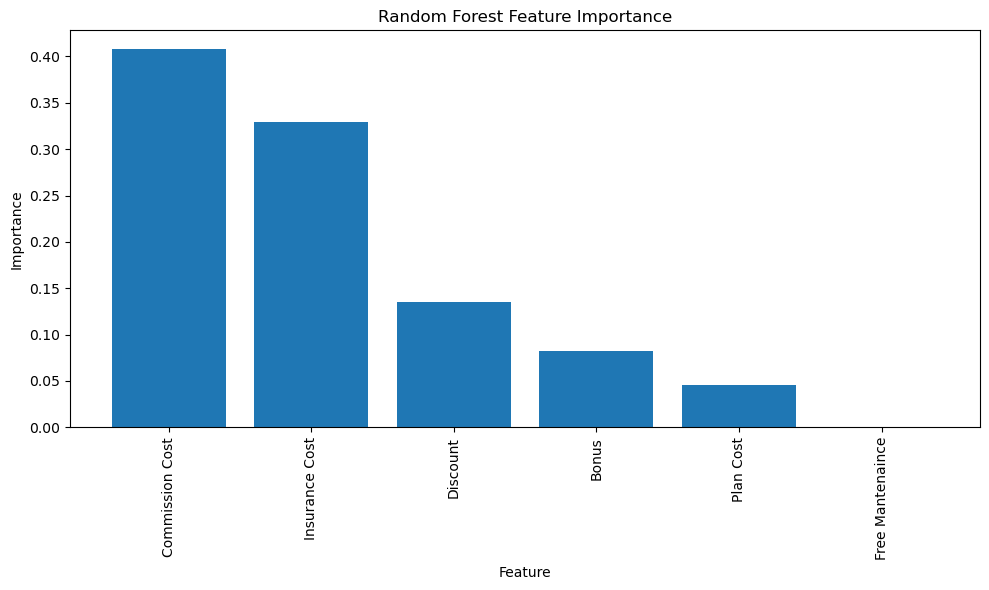

In [174]:
# Get feature importances from the trained Random Forest model
feature_importances = best_random_forest_model.feature_importances_

# Get the names of the features
feature_names = X.columns

# Sort the features based on importance
sorted_indices = feature_importances.argsort()[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[sorted_indices])
plt.xticks(range(X.shape[1]), [feature_names[i] for i in sorted_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

Having this, I 'll analyze each Segment and its feature importance:

In [175]:
# Get the list of unique segments
unique_segments = df_dropped['GM Segment'].unique()

# Create an empty dataframe to store feature importances for each segment
feature_importance_df = pd.DataFrame(columns=['Segment', 'Feature', 'Importance'])

# Loop through each segment and analyze feature importances
for segment in unique_segments:
    segment_filter = df_dropped['GM Segment'] == segment
    df_segment = df_dropped[segment_filter]
    
    # Separate features and target variable for the current segment
    X_segment = df_segment.loc[:, ['Insurance Cost', 'Commission Cost', 'Plan Cost', 'Free Mantenaince', 'Discount', 'Bonus']]
    y_segment = df_segment['Volumen']
    
    # Create a Random Forest model for the segment
    rf_model = RandomForestRegressor(
        n_estimators=150,
        max_depth=None,
        min_samples_leaf=1,
        min_samples_split=10,
        max_features='auto',
        random_state=42
    )
    
    # Train the model on the segment data
    rf_model.fit(X_segment, y_segment)
    
    # Get feature importances
    feature_importances = rf_model.feature_importances_
    
    # Add feature importances to the dataframe
    for feature_idx, feature_name in enumerate(X_segment.columns):
        feature_importance_df = feature_importance_df.append({
            'Segment': segment,
            'Feature': feature_name,
            'Importance': feature_importances[feature_idx]
        }, ignore_index=True)

# Display the dataframe with feature importances for each segment
print(feature_importance_df)

# Optionally, save the dataframe to a CSV file
feature_importance_df.to_csv('feature_importances_by_segment.csv', index=False)

C:\Users\Ruben D. Colmenares\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1803269127.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = feature_importance_df.append({
C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1803269127.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = feature_importance_df.append({
C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1803269127.py:34: FutureWarnin

C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1803269127.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = feature_importance_df.append({
C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1803269127.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = feature_importance_df.append({
C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1803269127.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = feature_importance_df.append({
C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1803269127.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1803269127.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = feature_importance_df.append({
C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1803269127.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = feature_importance_df.append({
C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1803269127.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = feature_importance_df.append({
C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1803269127.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1803269127.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = feature_importance_df.append({
C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1803269127.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = feature_importance_df.append({
C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1803269127.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = feature_importance_df.append({
C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1803269127.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1803269127.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = feature_importance_df.append({
C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1803269127.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = feature_importance_df.append({
C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1803269127.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = feature_importance_df.append({
C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1803269127.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1803269127.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = feature_importance_df.append({
C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1803269127.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = feature_importance_df.append({
C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1803269127.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = feature_importance_df.append({
C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1803269127.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1803269127.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = feature_importance_df.append({
C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1803269127.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = feature_importance_df.append({
C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1803269127.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = feature_importance_df.append({
C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1803269127.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

          Segment           Feature  Importance
0    Luxury Car-2    Insurance Cost    0.296899
1    Luxury Car-2   Commission Cost    0.339947
2    Luxury Car-2         Plan Cost    0.118074
3    Luxury Car-2  Free Mantenaince    0.000000
4    Luxury Car-2          Discount    0.205215
..            ...               ...         ...
181       Truck-L   Commission Cost    0.445680
182       Truck-L         Plan Cost    0.044955
183       Truck-L  Free Mantenaince    0.000000
184       Truck-L          Discount    0.000704
185       Truck-L             Bonus    0.000000

[186 rows x 3 columns]


C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1803269127.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = feature_importance_df.append({
C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1803269127.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = feature_importance_df.append({
C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1803269127.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = feature_importance_df.append({
C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1803269127.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

In [176]:
## Now including MSRP into the analysis:

# Get the list of unique segments
unique_segments = df_dropped['GM Segment'].unique()

# Create an empty dataframe to store feature importances for each segment
feature_importance_df = pd.DataFrame(columns=['Segment', 'Feature', 'Importance'])

# Loop through each segment and analyze feature importances
for segment in unique_segments:
    segment_filter = df_dropped['GM Segment'] == segment
    df_segment = df_dropped[segment_filter]
    
    # Separate features and target variable for the current segment
    X_segment = df_segment.loc[:, ['MSRP','Insurance Cost', 'Commission Cost', 'Plan Cost', 'Free Mantenaince', 'Discount', 'Bonus']]
    y_segment = df_segment['Volumen']
    
    # Create a Random Forest model for the segment
    rf_model = RandomForestRegressor(
        n_estimators=150,
        max_depth=None,
        min_samples_leaf=1,
        min_samples_split=10,
        max_features='auto',
        random_state=42
    )
    
    # Train the model on the segment data
    rf_model.fit(X_segment, y_segment)
    
    # Get feature importances
    feature_importances = rf_model.feature_importances_
    
    # Add feature importances to the dataframe
    for feature_idx, feature_name in enumerate(X_segment.columns):
        feature_importance_df = feature_importance_df.append({
            'Segment': segment,
            'Feature': feature_name,
            'Importance': feature_importances[feature_idx]
        }, ignore_index=True)

# Display the dataframe with feature importances for each segment
print(feature_importance_df)

# Optionally, save the dataframe to a CSV file
feature_importance_df.to_csv('feature_importances_by_segment_(wMSRP).csv', index=False)

C:\Users\Ruben D. Colmenares\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1295899057.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = feature_importance_df.append({
C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1295899057.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = feature_importance_df.append({
C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1295899057.py:36: FutureWarnin

C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1295899057.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = feature_importance_df.append({
C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1295899057.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = feature_importance_df.append({
C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1295899057.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = feature_importance_df.append({
C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1295899057.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1295899057.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = feature_importance_df.append({
C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1295899057.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = feature_importance_df.append({
C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1295899057.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = feature_importance_df.append({
C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1295899057.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1295899057.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = feature_importance_df.append({
C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1295899057.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = feature_importance_df.append({
C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1295899057.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = feature_importance_df.append({
C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1295899057.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1295899057.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = feature_importance_df.append({
C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1295899057.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = feature_importance_df.append({
C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1295899057.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = feature_importance_df.append({
C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1295899057.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1295899057.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = feature_importance_df.append({
C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1295899057.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = feature_importance_df.append({
C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1295899057.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = feature_importance_df.append({
C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1295899057.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1295899057.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = feature_importance_df.append({
C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1295899057.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = feature_importance_df.append({
C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1295899057.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = feature_importance_df.append({
C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1295899057.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1295899057.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = feature_importance_df.append({
C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1295899057.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = feature_importance_df.append({
C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1295899057.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = feature_importance_df.append({
C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1295899057.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

          Segment           Feature  Importance
0    Luxury Car-2              MSRP    0.387529
1    Luxury Car-2    Insurance Cost    0.205267
2    Luxury Car-2   Commission Cost    0.139826
3    Luxury Car-2         Plan Cost    0.094728
4    Luxury Car-2  Free Mantenaince    0.000000
..            ...               ...         ...
212       Truck-L   Commission Cost    0.299498
213       Truck-L         Plan Cost    0.044342
214       Truck-L  Free Mantenaince    0.000000
215       Truck-L          Discount    0.001184
216       Truck-L             Bonus    0.000000

[217 rows x 3 columns]


C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1295899057.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = feature_importance_df.append({
C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1295899057.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = feature_importance_df.append({
C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1295899057.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = feature_importance_df.append({
C:\Users\Ruben D. Colmenares\AppData\Local\Temp\ipykernel_16844\1295899057.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi